Mounted at /content/drive
Found 96 images belonging to 3 classes.
Found 24 images belonging to 3 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 78s 6s/step - accuracy: 0.2355 - loss: 1.5250 - val_accuracy: 0.5000 - val_loss: 0.8829
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 16s 528ms/step - accuracy: 0.4807 - loss: 1.1011 - val_accuracy: 0.7917 - val_loss: 0.6620
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 692ms/step - accuracy: 0.5391 - loss: 0.8568 - val_accuracy: 0.6667 - val_loss: 0.7490
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 562ms/step - accuracy: 0.6612 - loss: 0.8918 - val_accuracy: 0.8333 - val_loss: 0.4635
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 529ms/step - accuracy: 0.8394 - loss: 0.5192 - val_accuracy: 0.8750 - val_loss: 0.4298
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 679ms/step - accuracy: 0.7264 - loss: 0.6246 - val_accuracy: 0.7917 - val_loss: 0.4348
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 521ms/step - accuracy: 0.8769 - loss: 0.3736 - val_accuracy: 0.7917 - val_loss: 0.5177
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 681ms/step - accuracy: 0.8031 - loss: 0.5105 - val_accuracy: 0.

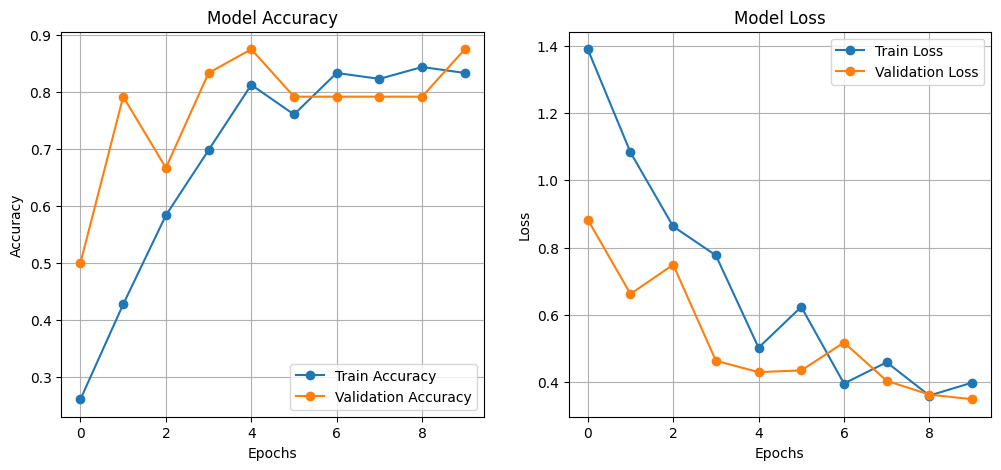

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 355ms/step


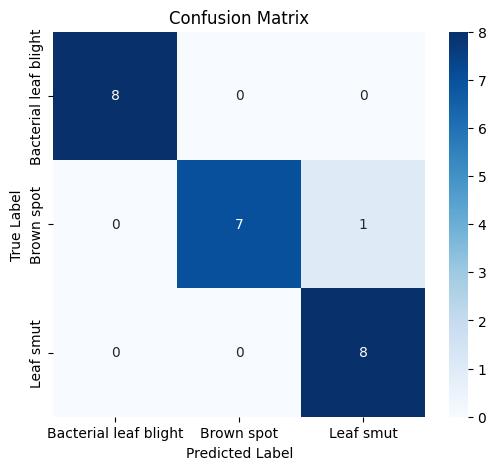

Classification Report:
                        precision    recall  f1-score   support

Bacterial leaf blight       1.00      1.00      1.00         8
           Brown spot       1.00      0.88      0.93         8
            Leaf smut       0.89      1.00      0.94         8

             accuracy                           0.96        24
            macro avg       0.96      0.96      0.96        24
         weighted avg       0.96      0.96      0.96        24

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


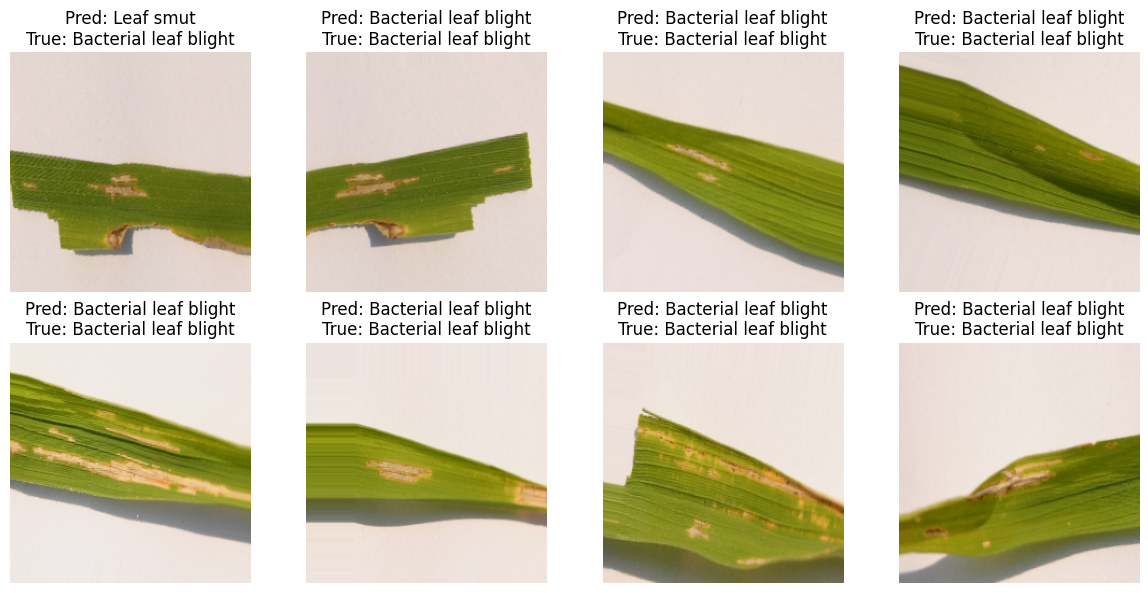

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from sklearn.metrics import classification_report, confusion_matrix
import itertools

# ✅ Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# ✅ Dataset Path
data_dir = '/content/drive/My Drive/rice_leaf_diseases'

# ✅ Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_gen = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=8,
    class_mode='categorical',
    subset='training'
)

val_gen = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=8,
    class_mode='categorical',
    subset='validation',
    shuffle=False  # Needed for correct confusion matrix
)

# ✅ Load MobileNetV2 (Pretrained)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze the base model

# ✅ Correct Model Definition
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(64, activation='relu')(x)
x = Dense(3, activation='softmax')(x)  # 3 classes
model = Model(inputs=base_model.input, outputs=x)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ✅ Train Model
history = model.fit(
    train_gen,
    epochs=10,
    validation_data=val_gen
)

# ✅ Save Model
model.save('/content/drive/My Drive/rice_leaf_disease_model.keras', save_format="keras")

# ✅ Training Accuracy & Loss Plot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.show()

# ✅ Confusion Matrix
y_true = val_gen.classes  # True labels
y_pred = model.predict(val_gen)  # Predictions
y_pred_classes = np.argmax(y_pred, axis=1)

class_labels = list(val_gen.class_indices.keys())

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# ✅ Classification Report
print("Classification Report:\n", classification_report(y_true, y_pred_classes, target_names=class_labels))

# ✅ Sample Predictions Visualization
fig, axes = plt.subplots(2, 4, figsize=(12, 6))  # 2 rows x 4 columns = 8 images
axes = axes.flatten()

for i, (img, label) in enumerate(zip(val_gen[0][0][:8], val_gen[0][1][:8])):  # Take only 8
    pred_idx = np.argmax(model.predict(np.expand_dims(img, axis=0)))
    true_idx = np.argmax(label)

    ax = axes[i]
    ax.imshow(img)
    ax.set_title(f"Pred: {class_labels[pred_idx]}\nTrue: {class_labels[true_idx]}")
    ax.axis("off")

plt.tight_layout()
plt.show()
